In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf


In [70]:
train_data=pd.read_csv('/content/train.csv')
train_data.head()

,ID,author,Review,Sentiment
0,39467,rayinstirling,Today I'm working on my &quot;Quirky Q&quot; c...,2
1,30154,DirtyRose17,@ShannonElizab dont ya know? people love the h...,1
2,16767,yoliemichelle,ughhh rejected from the 09 mediation program. ...,0
3,9334,jayamelwani,@petewentz im so jealous. i want an octo drive,0
4,61178,aliisanoun,I remember all the hype around this movie when...,0


In [71]:
train_data['Sentiment'].value_counts()

0    19299
2    18733
1     6068
Name: Sentiment, dtype: int64

In [72]:
train_data.shape

(44100, 4)

In [73]:
train_data=train_data.dropna()
print(train_data.shape)

(44100, 4)


In [74]:
X=train_data.drop('Sentiment',axis=1)
X.head()

,ID,author,Review
0,39467,rayinstirling,Today I'm working on my &quot;Quirky Q&quot; c...
1,30154,DirtyRose17,@ShannonElizab dont ya know? people love the h...
2,16767,yoliemichelle,ughhh rejected from the 09 mediation program. ...
3,9334,jayamelwani,@petewentz im so jealous. i want an octo drive
4,61178,aliisanoun,I remember all the hype around this movie when...


In [75]:
y=train_data['Sentiment']

In [76]:
test_data=pd.read_csv('/content/test.csv')
test_data.head()

,ID,author,Review
0,29536,nathantbaker,@amyswarren ahhh yay! I'm getting into it. Kno...
1,13442,Umatter2Chtr,@DeliverImHungry You are right. If you ordere...
2,54697,bella_cullen_4,I'd heard a lot of bad things about this film ...
3,7007,marviemorales,"I miss the old... HA, HA. I can't tell that pe..."
4,34410,phaoloo,@dharshana anytime


In [77]:
test_data.shape

(18900, 3)

In [110]:
from tensorflow.keras.layers import Embedding,Flatten,Dense,LSTM,Bidirectional,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [79]:
vocab_size=5000

In [80]:
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [81]:
messages=X.copy()
messages.reset_index(inplace=True)
messages.head()

,index,ID,author,Review
0,0,39467,rayinstirling,Today I'm working on my &quot;Quirky Q&quot; c...
1,1,30154,DirtyRose17,@ShannonElizab dont ya know? people love the h...
2,2,16767,yoliemichelle,ughhh rejected from the 09 mediation program. ...
3,3,9334,jayamelwani,@petewentz im so jealous. i want an octo drive
4,4,61178,aliisanoun,I remember all the hype around this movie when...


In [82]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
ps=PorterStemmer()
corpus_train=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['Review'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus_train.append(review)

In [84]:
corpus_train[0:10]

['today work quot quirki q quot cue mayb becom concerto',
 'shannonelizab dont ya know peopl love human societi',
 'ughhh reject mediat program suckssss',
 'petewentz im jealou want octo drive',
 'rememb hype around movi aaliyah kill fan ms rice novel first thought queen damn without vampir lestat first br br final seen movi see read book imagin take gori part vampir lestat cram marcu mariu one charact remov everyth lestat begin wolf hunt violin play theatr vampir also loui claudia gabriel last minut cram queen damn br br loos import piec lestat charact inner agoni kill live fact care tri select killer victim love hate relationship loui armand gabriel vampir br br also import stori loos stori twin genesi ms rice vampir sure cannib intens show screen could done someth closer show us ancient egypt br br even wors love interest thrown jessi lestat vampir chronicl basic american yoni stori know yoni anoth form hentai japanes porn comic yoni gay male relationship told femal sure mani men ob

In [85]:
messages['Review'][0:10]

0    Today I'm working on my &quot;Quirky Q&quot; c...
1    @ShannonElizab dont ya know? people love the h...
2    ughhh rejected from the 09 mediation program. ...
3       @petewentz im so jealous. i want an octo drive
4    I remember all the hype around this movie when...
5    I liked this quite a bit but I have friends th...
6    loving that spring definitely seems to be here...
7                         @jeg007jeg yay  coutch:couch
8    Working on the store's Facebook group, getting...
9    @falselove OH THAT'S GOOD! My top 4 are: The H...
Name: Review, dtype: object

In [86]:
one_hot_rep=[one_hot(words,vocab_size) for words in corpus_train]
one_hot_rep[0]

[1182, 145, 1196, 2532, 3300, 1196, 1337, 3146, 4637, 653]

In [87]:
sent_length=20
embedded_docs=pad_sequences(one_hot_rep,padding='pre',maxlen=sent_length)
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1182,
        145, 1196, 2532, 3300, 1196, 1337, 3146, 4637,  653], dtype=int32)

In [111]:
## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(vocab_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [112]:
X_final=np.asarray(embedded_docs)
y_final=np.asarray(y)

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(33075, 20) (33075,)
(11025, 20) (11025,)


In [114]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
1034/1034 [==============================] - 13s 11ms/step - loss: -3.7010 - accuracy: 0.1956 - val_loss: -11.5546 - val_accuracy: 0.2522
Epoch 2/20
1034/1034 [==============================] - 10s 10ms/step - loss: -24.9346 - accuracy: 0.2560 - val_loss: -30.9522 - val_accuracy: 0.2232
Epoch 3/20
1034/1034 [==============================] - 10s 10ms/step - loss: -49.7697 - accuracy: 0.2447 - val_loss: -50.2500 - val_accuracy: 0.2059
Epoch 4/20
1034/1034 [==============================] - 10s 9ms/step - loss: -62.5771 - accuracy: 0.2340 - val_loss: -59.7536 - val_accuracy: 0.2367
Epoch 5/20
1034/1034 [==============================] - 10s 9ms/step - loss: -99.4053 - accuracy: 0.2528 - val_loss: -62.8349 - val_accuracy: 0.2798
Epoch 6/20
1034/1034 [==============================] - 10s 9ms/step - loss: -114.1636 - accuracy: 0.2346 - val_loss: -105.4097 - val_accuracy: 0.2018
Epoch 7/20
1034/1034 [==============================] - 10s 9ms/step - loss: -160.3768 - accuracy: 0.2

In [92]:
import matplotlib.pyplot as plt

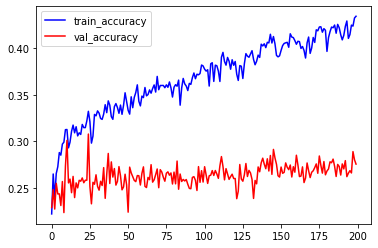

In [115]:
plt.plot(train_model.history['accuracy'],'b',label='train_accuracy')
plt.plot(train_model.history['val_accuracy'],'r',label='val_accuracy')
plt.legend()

In [94]:
def test(X):
    X=X.fillna(0)
    messages=X.copy()
    messages.reset_index(inplace=True)
    corpus=[]
    for i in range(len(messages)):
        reviews=re.sub('[^a-zA-Z]',' ',str(messages['Review'][i]))
        reviews=reviews.lower()
        reviews=reviews.split()
        reviews=[ps.stem(word) for word in reviews if word not in stopwords.words('english')]
        reviews=' '.join(reviews)
        corpus.append(reviews)
    one_hot_rep=[one_hot(word,vocab_size)for word in corpus]
    embedded_docs = pad_sequences(one_hot_rep, padding = 'pre', maxlen = sent_length)
    X_final = np.array(embedded_docs)
    
    
    return X_final

In [95]:
test_data_new= test(test_data)
test_data_new[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 4569,  750,   25, 2473, 1223,  966], dtype=int32)

In [116]:
pred=model1.predict(test_data_new)
print(pred.shape)

(18900, 1)


In [117]:
submission_data = pd.read_csv('/content/submission.csv')

In [118]:
submission_data['label']=np.round(pred).astype('int')

In [119]:
submission_data.head()

,Negative_0,Neutral_1,Positive_2,label
0,0,1,0,1
1,1,0,0,1
2,0,0,1,1
3,0,0,0,1
4,0,0,0,1


In [103]:

k=submission_data.drop(['label'],axis=1)
k.head()

,Negative_0,Neutral_1,Positive_2
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [101]:
submission_data.to_csv('submitkn.csv' ,index=False)